<a href="https://colab.research.google.com/github/Mechanics-Mechatronics-and-Robotics/CV-2025/blob/main/Week_12/Hands_on_CLIPSeg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zero-Shot Image Segmentation with CLIPSeg

**Implementation** Note:  
This notebook was developed using methodologies suggested by  
the DeepSeek-V3 language model (DeepSeek, 2024).

In [1]:
# Install required libraries
!pip install -q transformers torch pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.0 MB/s eta 0:00:00


In [2]:
import requests
import torch
from torch.nn.functional import interpolate

from PIL import Image

from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import gridspec

from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation

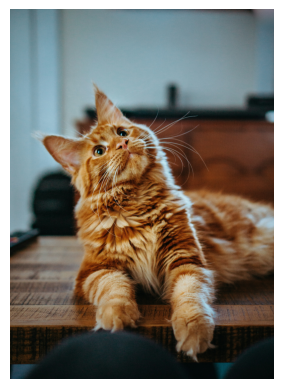

In [3]:
#@title Image Input Options {run: "auto"}
input_method = "URL" #@param ["URL", "Upload"]

if input_method == "URL":
    # Use example image or paste your own URL
    url = "https://images.unsplash.com/photo-1573865526739-10659fec78a5"  # Cat image
    image = Image.open(requests.get(url, stream=True).raw)
else:
    # Upload custom image
    from google.colab import files
    uploaded = files.upload()
    file_name = next(iter(uploaded))
    image = Image.open(file_name)

# Display the image
plt.imshow(np.array(image))
plt.axis('off')
plt.show()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.73k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/603M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/974 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/image_processing_utils.py:42: UserWarning: The following named arguments are not valid for `ViTImageProcessor.preprocess` and were ignored: 'padding'
  return self.preprocess(images, **kwargs)


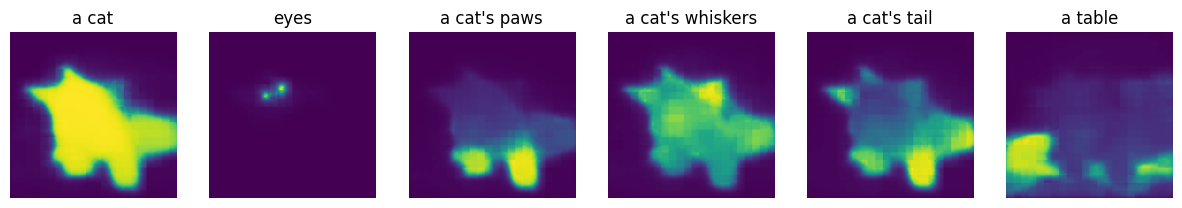

In [4]:
# Load model
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")
processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")


# Define text prompts (multiple supported)
texts = ["a cat", "eyes", "a cat's paws", "a cat's whiskers",
         "a cat's tail", "a table"]
# Process inputs
inputs = processor(text=texts, images=[image]*len(texts), return_tensors="pt", padding=True)

# Predict
with torch.no_grad():
    outputs = model(**inputs)

# Visualize masks
fig, axes = plt.subplots(1, len(texts), figsize=(15,5))
for idx, (text, mask) in enumerate(zip(texts, outputs.logits)):
    axes[idx].imshow(mask.sigmoid().numpy(), cmap='viridis')
    axes[idx].set_title(text)
    axes[idx].axis('off')
plt.show()

In [5]:
for idx, (text, mask) in enumerate(zip(texts, outputs.logits)):
    mask_norm = mask.sigmoid().numpy()
    mean_confidence = mask_norm.mean()
    print(mean_confidence)

0.34097892
0.003336427
0.10671746
0.11317652
0.12287193
0.13684021


<ipython-input-6-9ef7867ce53e>:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


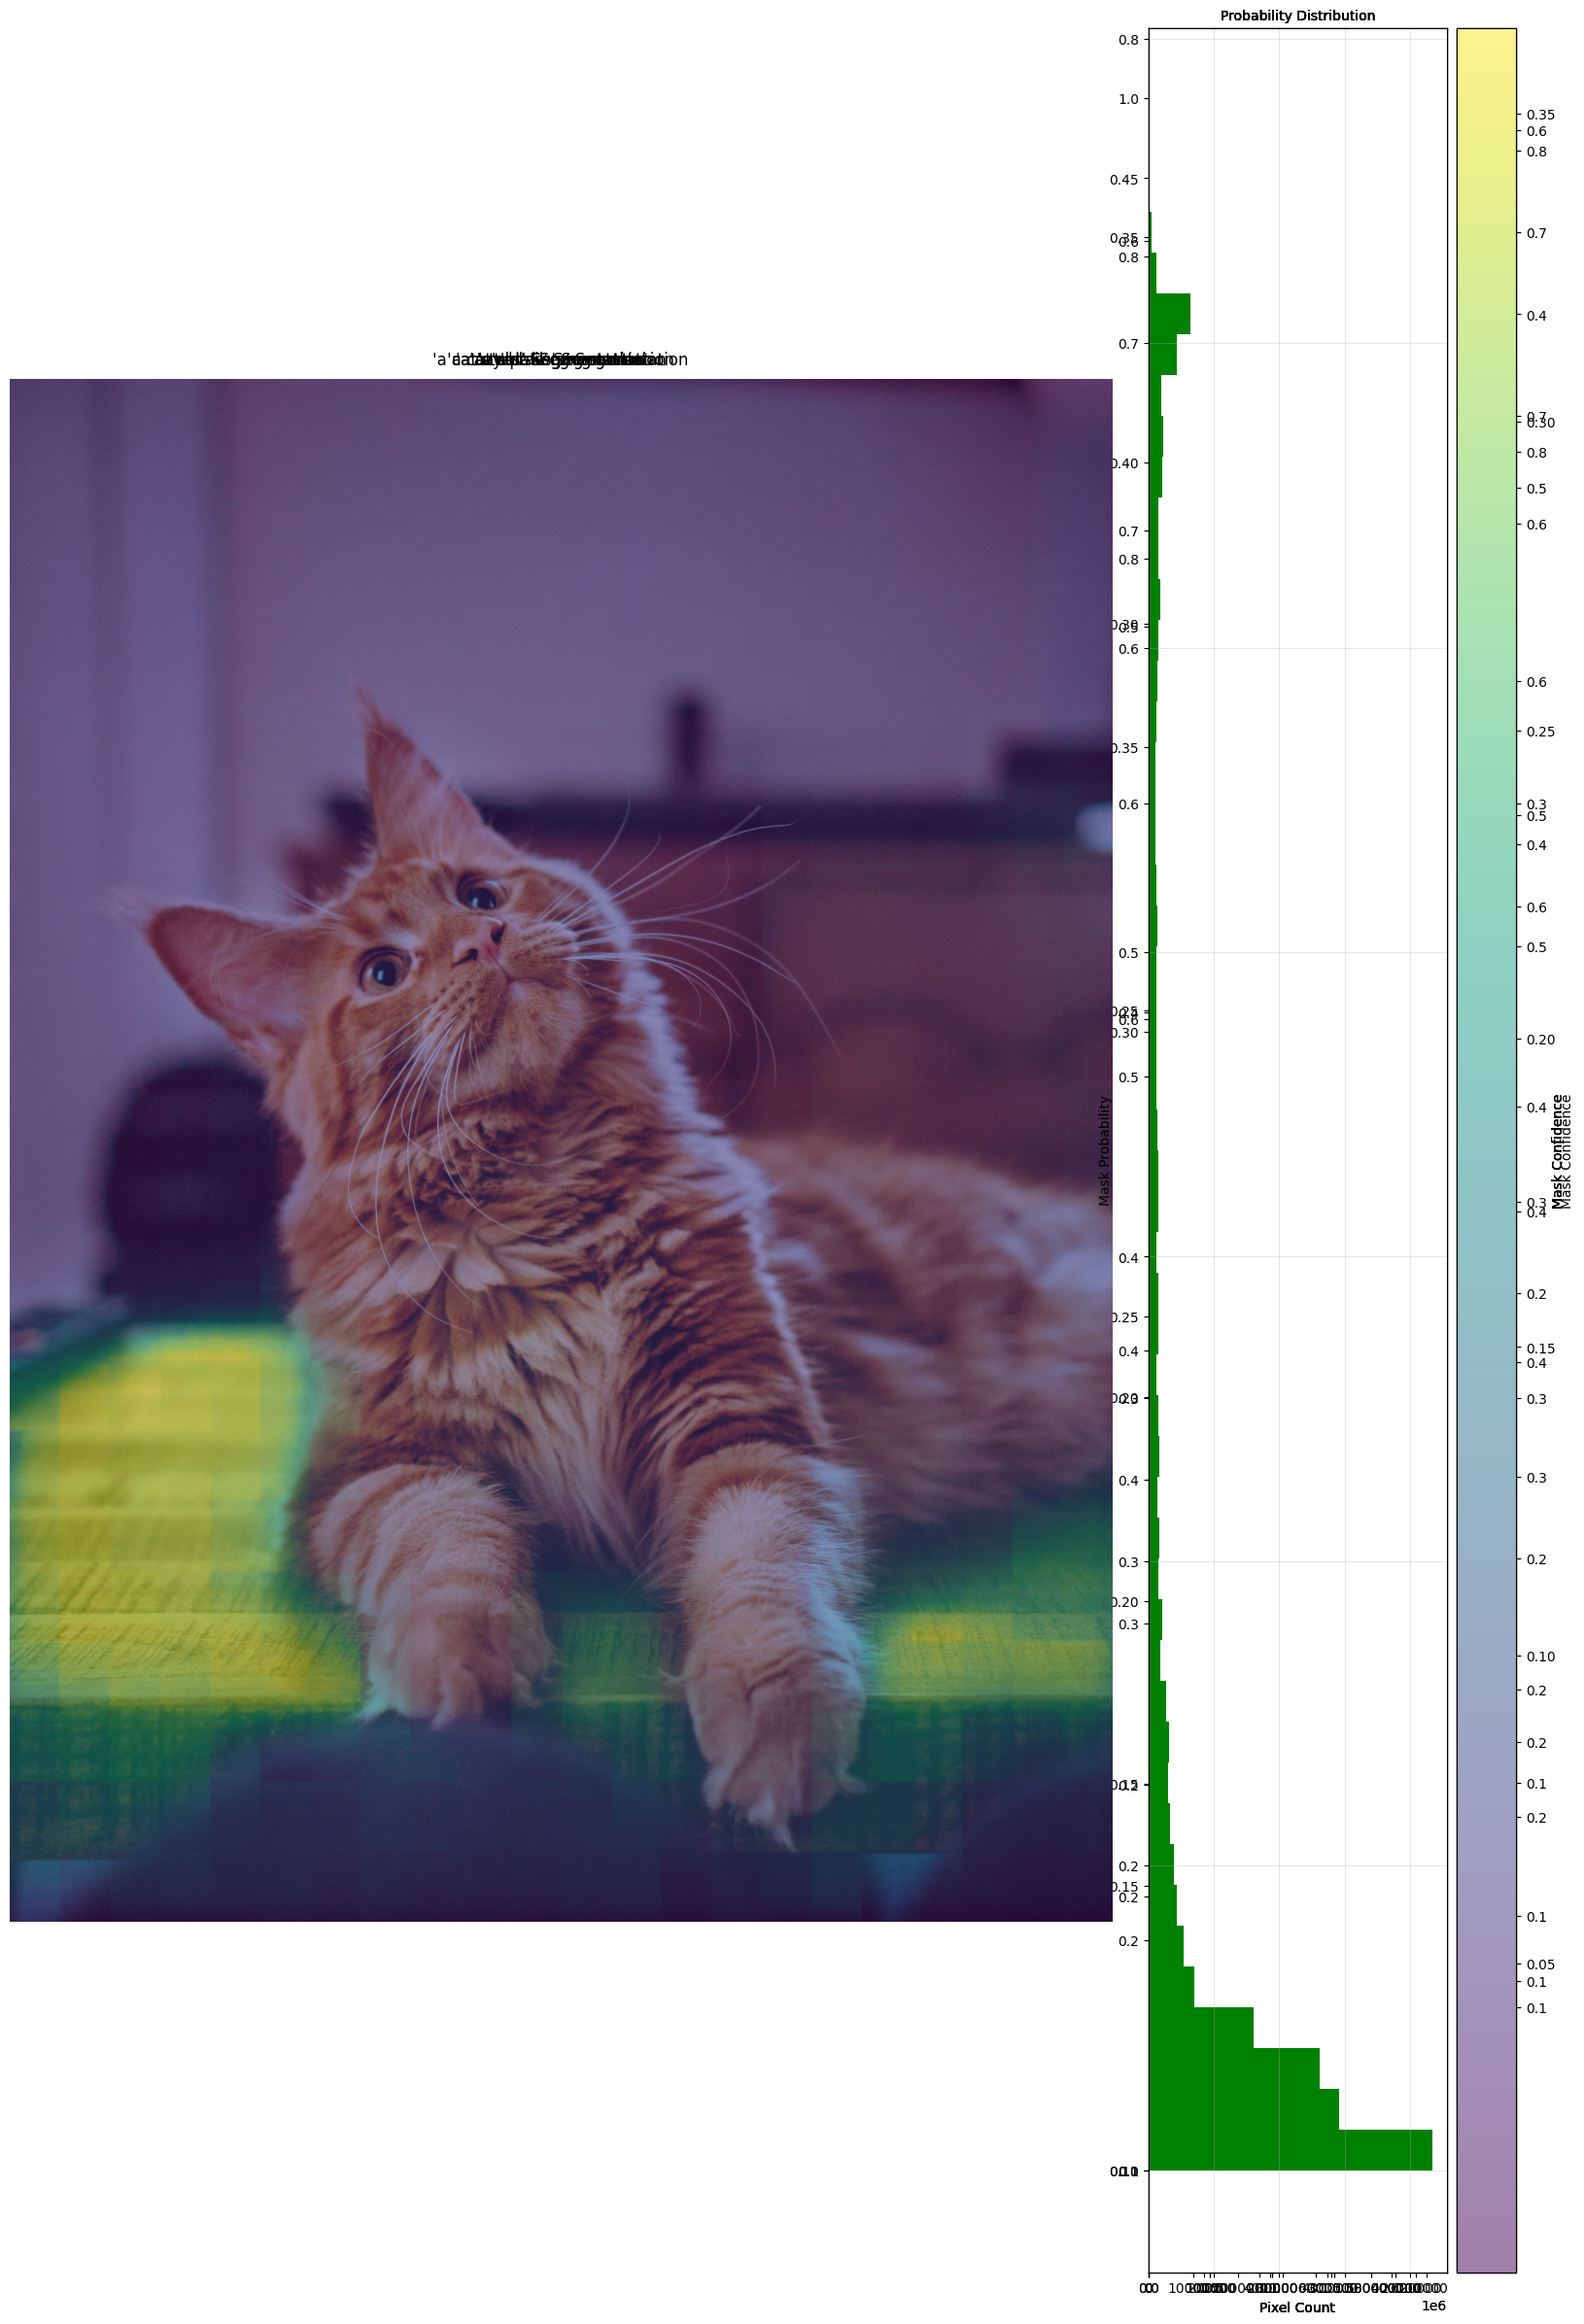

In [6]:
#title Enhanced Segmentation Visualization with Probability Sidebars

# Create figure
fig = plt.figure(figsize=(20, 5 * len(texts)))  # Adjust height based on number of texts

for idx, (text, mask) in enumerate(zip(texts, outputs.logits)):
    # Create grid layout for this segmentation
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1], wspace=0.05)

    # Main image with mask overlay
    ax0 = plt.subplot(gs[0])
    img_array = np.array(image)

    # Resize mask to match image
    mask_resized = interpolate(
        mask.unsqueeze(0).unsqueeze(0),
        size=img_array.shape[:2],
        mode='bilinear'
    ).squeeze().numpy()
    mask_norm = 1 / (1 + np.exp(-mask_resized))

    # Display
    ax0.imshow(img_array)
    overlay = ax0.imshow(mask_norm, cmap='viridis', alpha=0.5)
    ax0.set_title(f"'{text}' Segmentation", fontsize=12, pad=10)
    ax0.axis('off')

    # Add colorbar sidebar
    ax1 = plt.subplot(gs[1])
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="20%", pad=0.1)

    # Create histogram of probabilities
    hist_data = mask_norm.flatten()
    hist_data = hist_data[hist_data > 0.1]  # Filter very low probabilities

    ax1.hist(hist_data, bins=50, orientation='horizontal', color='green')
    ax1.set_xlabel('Pixel Count')
    ax1.set_ylabel('Mask Probability')
    ax1.set_title('Probability Distribution', fontsize=10)
    ax1.grid(True, alpha=0.3)

    # Add colorbar
    plt.colorbar(overlay, cax=cax, label='Mask Confidence')

plt.tight_layout()
plt.show()